## Data Science And Business Analytics Internship At The Sparks Foundation.

#GRIPJUNE21

Author : Naganandan P

#Task-1

Prediction using Supervised ML.
Problem statement: Predict the percentage of an student based on the no. of study hours.
and represent it visually..

Link to Dataset:http://bit.ly/w-data

In [2]:
#Importing all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
url = "http://bit.ly/w-data"        # Reading data from remote link
data = pd.read_csv(url)

In [ ]:
data.head(2)         #Display first two rows of the dataset

In [14]:
data.shape         #Gives the number of rows and columns

(25, 2)

In [6]:
data.duplicated().sum()     #chechking whether dataset is having any null values or not

0

In [7]:
data.dtypes                  #Display the data types of the attribute in the data set

Hours     float64
Scores      int64
dtype: object

In [8]:
data.info()             #information about all the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## Plotting for understanding type of relation

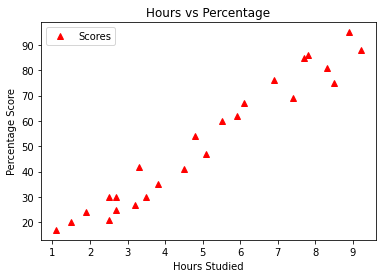

In [19]:
data.plot(x='Hours',y='Scores',style='^',color='red')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

## Model Development and Refinement

### Segrating the data

In [21]:
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values

### Splitting the dataset to train and test set

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [25]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [27]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

## Training our Algorithm

### The Algorithm we are using is - Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

### Linear equation: y=mx+c

In [36]:
print('Intercept value is :',model.intercept_)
print('Linear coefficient is:',model.coef_)

Intercept value is : 2.018160041434683
Linear coefficient is: [9.91065648]


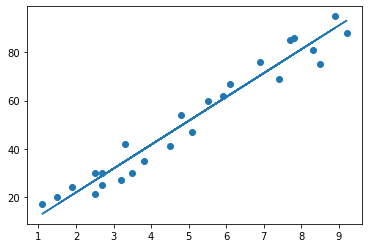

In [40]:
line=model.coef_*x + model.intercept_

plt.scatter(x,y)
plt.plot(x, line);
plt.show()

## Making Predictions

In [42]:
y_pred=model.predict(x_test)

### Comparing Actual vs Predicted

In [44]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


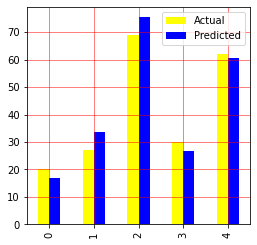

In [47]:
df.plot(kind='bar',figsize=(4,4), color=('yellow','blue'))
plt.grid(which='major', linewidth='0.5', color='red')
plt.grid(which='minor', linewidth='0.5', color='black')
plt.show()

### Testing with our own input

In [49]:
hours=8.3
own_pred=model.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 8.3
Predicted Score = 84.27660883076526


### Checking the error

In [51]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975


## Accuracy

In [53]:
print('R^2:', metrics.r2_score(y_test, y_pred))

R^2: 0.9454906892105356


#### The accuracy of model is : 94.5%